In [20]:
import torchvision
from torchvision import transforms
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
import matplotlib.pyplot as plt
import cv2
from diffusers import UNet2DModel
from diffusers import AutoencoderKL
from diffusers import DDPMScheduler, DPMSolverMultistepScheduler, DDIMScheduler
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm
from diffusers.pipeline_utils import DiffusionPipeline
from diffusers import DDPMPipeline
from diffusers import StableDiffusionPipeline
from PIL import Image
import json
import create_init_unet
import pathlib
import copy
device = "cuda"
VAE_SCALE_FACTOR = 0.18215

In [11]:
root = pathlib.Path.cwd()
print(root)

e:\Projects\sketch2img


In [12]:
pipe = DDPMPipeline.from_pretrained("E:\SD_models\diffusers\ddpm-celebahq-256")

In [27]:
pipe.__init__()

TypeError: DDPMPipeline.__init__() missing 2 required positional arguments: 'unet' and 'scheduler'

In [22]:
d["in_channels"] = 4
print(pipe.unet.config)

FrozenDict([('sample_size', 256), ('in_channels', 3), ('out_channels', 3), ('center_input_sample', False), ('time_embedding_type', 'positional'), ('freq_shift', 1), ('flip_sin_to_cos', False), ('down_block_types', ['DownBlock2D', 'DownBlock2D', 'DownBlock2D', 'DownBlock2D', 'AttnDownBlock2D', 'DownBlock2D']), ('up_block_types', ['UpBlock2D', 'AttnUpBlock2D', 'UpBlock2D', 'UpBlock2D', 'UpBlock2D', 'UpBlock2D']), ('block_out_channels', [128, 128, 256, 256, 512, 512]), ('layers_per_block', 2), ('mid_block_scale_factor', 1), ('downsample_padding', 0), ('act_fn', 'silu'), ('attention_head_dim', None), ('norm_num_groups', 32), ('norm_eps', 1e-06), ('resnet_time_scale_shift', 'default'), ('add_attention', True), ('_class_name', 'UNet2DModel'), ('_diffusers_version', '0.11.1'), ('_name_or_path', 'E:\\SD_models\\diffusers\\ddpm-celebahq-256\\unet')])


In [ ]:
create_init_unet.create_diffusers_init_unet(
    r"E:\SD_models\diffusers\ddpm-celebahq-256\unet",

)

In [36]:
scheduler =  DPMSolverMultistepScheduler.from_pretrained("E:\SD_models\diffusers\ddpm-celebahq-256\scheduler")
scheduler.set_timesteps(num_inference_steps=5)
image_pipe = pipe

In [39]:
# The random starting point
x = torch.randn(4, 3, 256, 256).to(device)  # Batch of 4, 3-channel 256 x 256 px images

# Loop through the sampling timesteps
for i, t in tqdm(enumerate(scheduler.timesteps)):

    # Prepare model input
    model_input = scheduler.scale_model_input(x, t)

    # Get the prediction
    with torch.no_grad():
        noise_pred = image_pipe.unet(model_input, t)["sample"]

    # Calculate what the updated sample should look like with the scheduler
    scheduler_output = scheduler.step(noise_pred, t, x)

    # Update x
    x = scheduler_output.prev_sample

5it [00:02,  1.74it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


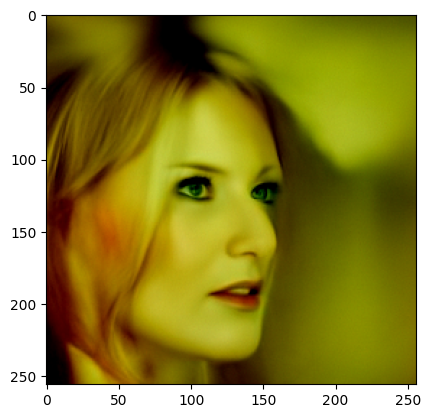

In [40]:
plt.imshow(x[0].cpu().permute(1,2,0).numpy())

In [44]:
d = json.load(r"E:\SD_models\diffusers\ddpm-celebahq-256\unetE:\SD_models\config.json")

AttributeError: 'str' object has no attribute 'read'

In [49]:
with open(r"E:\SD_models\diffusers\ddpm-celebahq-256\unet\config.json") as f:
    d = json.load(f)

In [54]:
d["in_channels"]

3

In [59]:
a = {
    "hoge":1,
    "moge":2,
}
b = a
a["toge"] = 3
print(a, b)

{'hoge': 1, 'moge': 2, 'toge': 3} {'hoge': 1, 'moge': 2, 'toge': 3}
